## Hidden Markov Model

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm
import seaborn as sns

In [42]:
#leemos el dataset
df=pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [43]:
#visualización de los 10 primeros datos
df.head(10)

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1
5,cc6217be863e606e49da90fee2252f52,117,208,117,208,117,240,117,240,117,...,141,65,260,141,65,9,117,260,65,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,215,274,158,215,274,158,215,172,117,...,117,240,117,172,60,81,60,81,225,1
7,164b56522eb24164184460f8523ed7e2,82,240,117,240,117,240,117,240,117,...,35,172,117,275,240,80,60,215,35,1
8,56ae1459ba61a14eb119982d6ec793d7,82,240,117,240,117,240,117,240,117,...,117,16,31,215,108,208,80,240,117,1
9,c4148ca91c5246a8707a1ac1fd1e2e36,82,208,187,208,172,117,172,208,16,...,117,172,117,208,172,117,100,215,35,1


In [44]:
#desplegar la descripción del dataset
df.describe()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
count,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,...,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000
mean,142.830226,211.477414,148.217294,189.045674,187.514746,174.190218,170.290022,199.070015,142.659016,167.358921,...,154.448332,173.219459,159.951568,164.615074,173.637159,152.397848,158.442543,160.717203,155.788199,0.975408
std,75.599441,60.082481,47.667868,68.119087,71.196556,65.713664,55.469501,65.474790,66.756934,53.440972,...,78.342789,82.696235,74.248027,70.240283,70.632812,79.819427,78.142193,74.979008,79.068212,0.154880
min,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,172.000000,117.000000,117.000000,117.000000,117.000000,117.000000,159.000000,117.000000,117.000000,...,81.000000,117.000000,114.000000,117.000000,117.000000,89.000000,100.000000,108.000000,75.250000,1.000000
50%,82.000000,240.000000,158.000000,215.000000,172.000000,158.000000,172.000000,215.000000,117.000000,172.000000,...,141.000000,172.000000,141.000000,171.000000,172.000000,141.000000,171.000000,158.000000,141.000000,1.000000
75%,215.000000,240.000000,172.000000,240.000000,274.000000,240.000000,215.000000,240.000000,208.000000,208.000000,...,240.000000,260.000000,240.000000,215.000000,240.000000,215.000000,224.000000,226.000000,225.000000,1.000000
max,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,1.000000


In [45]:
# Variable objetivo
VariableObjetivo=['malware']
#variables de entrada
VariablesEntrada=['t_0', 't_1', 't_2', 't_3','t_4', 't_5', 't_6', 't_7', 't_8','t_9', 't_10', 't_11', 't_12', 't_13',
                  't_14', 't_15', 't_16', 't_17', 't_18','t_19', 't_20', 't_21', 't_22', 't_23','t_24', 't_25', 't_26', 't_27',
                  't_28','t_29', 't_30', 't_31', 't_32', 't_33','t_34', 't_35', 't_36', 't_37', 't_38','t_39', 't_40', 't_41',
                  't_42', 't_43','t_44', 't_45', 't_46', 't_47', 't_48','t_49', 't_50', 't_51', 't_52', 't_53','t_54', 't_55',
                  't_56', 't_57', 't_58','t_59', 't_60', 't_61', 't_62', 't_63','t_64', 't_65', 't_66', 't_67', 't_68','t_69',
                  't_70', 't_71', 't_72', 't_73','t_74', 't_75', 't_76', 't_77', 't_78','t_79', 't_80', 't_81', 't_82', 't_83',
                  't_84', 't_85', 't_86', 't_87', 't_88','t_89', 't_90', 't_91', 't_92', 't_93','t_94', 't_95', 't_96', 't_97',
                  't_98','t_99']

In [46]:
#Se obtiene los valores de entreda y se lo define como X
X=df[VariablesEntrada].values
#Se obtiene los valores de objetivo y se lo define como Y
y=df[VariableObjetivo].values

In [47]:
#importa libreía StandardScaler
from sklearn.preprocessing import StandardScaler
#se define la variable de entrada con StandardScaler
VariablesEntradaScaler=StandardScaler()

In [48]:
#se adapta las variables de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
#Tranforma los datos adaptados de la variable de entrada
X=VariablesEntradaFit.transform(X)

In [58]:

# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
y_pred=model.predict(X)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.757452821588112

In [60]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y, y_pred)
print('Matriz de Confusión de la predicción del analisis del malware:')
print(matriz)

Matriz de Confusión de la predicción del analisis del malware:
[[  316   763]
 [ 9879 32918]]


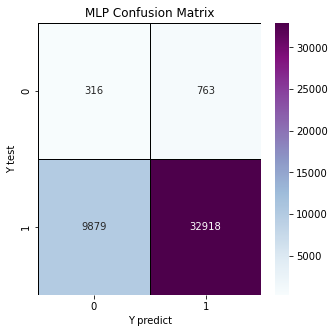

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
mlp_cm = confusion_matrix(y, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [62]:
from sklearn.metrics import precision_score
precision = precision_score(y, y_pred)
print('Precisión del modelo del analisis del malware:')
print(precision)

Precisión del modelo del analisis del malware:
0.9773462783171522
